# $ Group$ $One$ $Final$ $Project$
   ### $Investing$ $In$ $Stocks$

### $Parthik$ $Davda$, $Mingtai Dong$, $Rahul$ $Mehta$, $Vasudha Mishra$, $and$ $Jonathan$ $Stone$

---




### $The$ $Nine$ $Selected$ $Companies$ 
### from the Energy, Consumer Staples, and Healthcare Sectors


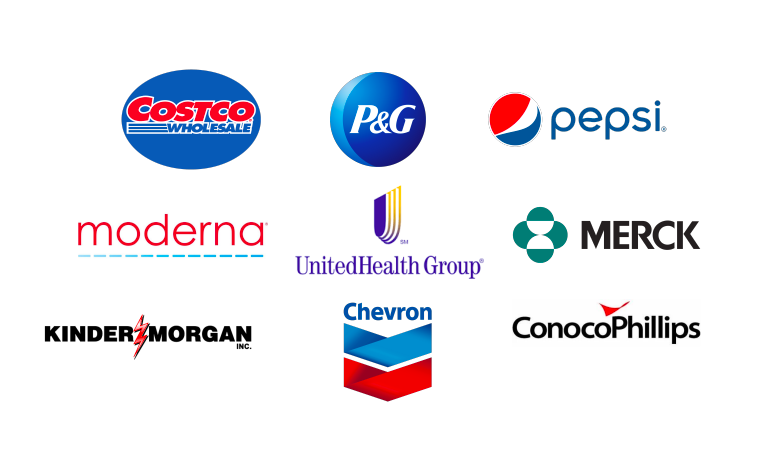


### Step One: Import Libraries

In [ ]:
# some stock-specific packages
# you may need to restart your runtime
# https://stackoverflow.com/questions/68230237/python-pandas-datareader-and-yahoo-error-remotedataerror-unable-to-read-url
!pip install yahoo_fin
!pip install requests_html
!pip install --upgrade pandas numpy matplotlib
# you may need to restart your runtime
# https://stackoverflow.com/questions/68230237/python-pandas-datareader-and-yahoo-error-remotedataerror-unable-to-read-url
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 3.5 MB/s 
     |████████████████████████████████| 83 kB 1.0 MB/s 
     |████████████████████████████████| 50 kB 2.7 MB/s 
     |████████████████████████████████| 106 kB 2.9 MB/s 
     |████████████████████████████████| 127 kB 42.7 MB/s 
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=e41a2caeec5c861278c0d8acf3ae5d3a12b8d6e1cf9e7887ded0de3b1c5391bd
  Stored in directory: /root/.cache/pip/wheels/e5/33/1f/68392720485b3ecf125a69e700baaab7624616deedea2fa6e2
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=423972b4786f87f750ed1941087d3c029e19d83172129206ff705139abdec34c
  Stored in directory: /root/.cache/pip/wheels/83/63/2f/117884c3b19d46b64d3d61690333aa80c88dc14050e269c546
Successfully built parse sgmllib3k
  Attempting uninstall: urllib3
    Found existing installation: 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
# some useful modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yahoo_fin.stock_info as si
import numpy as np
import pandas_datareader as pdr
from datetime import datetime
import time
import warnings
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.5f}'.format



### Step Two: Prepare the data

Retrieving historical data from the web

In [ ]:
# Assign the ticker list that we want to scrap
tickers_list = ['CVX','KMI','COP','COST','PEP','PG','MRNA','MRK','UNH']
# pull historical price data for each stocks to match with our news score later
dow_prices = {ticker : si.get_data(ticker,start_date = '12/27/2017',end_date='01/22/2020',interval='1d') for ticker in tickers_list}

In [ ]:
# take a peak!
dow_prices

{'CVX':                 open      high       low     close  adjclose   volume ticker
 2017-12-27 125.96000 126.20000 125.13000 125.55000 100.82979  3452300    CVX
 2017-12-28 125.69000 125.89000 125.29000 125.58000 100.85387  2191800    CVX
 2017-12-29 125.36000 125.98000 125.19000 125.19000 100.54066  3829000    CVX
 2018-01-02 125.71000 127.74000 125.54000 127.58000 102.46009  5626000    CVX
 2018-01-03 127.46000 128.94000 126.90000 128.50999 103.20698  5805500    CVX
 ...              ...       ...       ...       ...       ...      ...    ...
 2020-01-14 116.50000 116.88000 115.71000 116.30000 100.94576  7189100    CVX
 2020-01-15 116.30000 116.41000 115.65000 116.13000 100.79819  5808800    CVX
 2020-01-16 116.56000 117.28000 116.45000 116.89000 101.45786  7022000    CVX
 2020-01-17 117.01000 117.29000 115.52000 115.58000 100.32082  7885900    CVX
 2020-01-21 115.10000 115.15000 113.17000 113.31000  98.35049  8470300    CVX
 
 [519 rows x 7 columns],
 'KMI':                open   

## $Clean$ $the$ $data$

In [ ]:
# let's extract just the data we need (adjclose)
# get the adjclose price for CVX
prep_data = pd.DataFrame(dow_prices['CVX']['adjclose']).rename(columns = {"adjclose":"CVX"})

# combine the remaining selected companies ticker symbols
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data

,CVX,KMI,COP,COST,PEP,PG,MRNA,MRK,UNH
2017-12-27,100.82979,13.60585,47.59286,173.91443,103.11163,80.37800,NaN,46.31608,204.86644
2017-12-28,100.85387,13.74851,47.24185,174.21313,103.15482,80.35178,NaN,46.52982,207.05061
2017-12-29,100.54066,13.56830,46.99358,173.74638,103.64748,80.18597,NaN,46.25853,204.90369
2018-01-02,102.46009,14.11644,47.36171,175.80014,102.03989,79.11255,NaN,46.21743,205.55423
2018-01-03,103.20698,14.23658,48.23497,177.90987,101.77197,79.01653,NaN,46.15166,207.71053
...,...,...,...,...,...,...,...,...,...
2020-01-14,100.94576,17.64291,58.03836,285.53525,125.83343,115.82370,20.00000,78.27150,276.10529
2020-01-15,100.79819,17.60181,57.91362,286.55453,127.99421,117.00339,20.24000,79.67279,283.93127
2020-01-16,101.45786,17.56892,57.97600,288.65973,128.37120,117.10558,21.01000,79.35944,288.07901
2020-01-17,100.32082,17.56070,57.97600,290.23145,129.88838,117.42141,20.62000,79.17668,285.90460


In [ ]:
prep_data.shape

(519, 9)

### Rather than use the raw time series, let's build a model based on past returns (the difference from the previous day).

In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()
# drop the null records
return_data.dropna(inplace=True)
return_data

,CVX,KMI,COP,COST,PEP,PG,MRNA,MRK,UNH
2018-12-10,-0.00476,-0.01896,-0.01077,-0.00978,0.00319,0.00627,0.01075,0.00912,-0.00984
2018-12-11,0.00461,0.00499,0.00368,0.01725,0.00947,0.00946,-0.04202,-0.00400,0.00259
2018-12-12,0.00130,0.00682,-0.00260,0.00574,-0.00247,0.00128,0.03720,0.01167,0.01280
2018-12-13,0.00277,0.01109,0.01318,-0.00566,0.01154,0.02616,0.00428,0.01282,0.00558
2018-12-14,-0.01820,-0.01463,-0.02389,-0.08587,-0.03718,0.00155,-0.02345,-0.02524,-0.02620
...,...,...,...,...,...,...,...,...,...
2020-01-14,-0.00309,-0.00418,0.00015,-0.00040,0.00234,-0.00152,-0.01283,0.00469,0.00836
2020-01-15,-0.00146,-0.00233,-0.00215,0.00357,0.01717,0.01019,0.01200,0.01790,0.02834
2020-01-16,0.00654,-0.00187,0.00108,0.00735,0.00295,0.00087,0.03804,-0.00393,0.01461
2020-01-17,-0.01121,-0.00047,0.00000,0.00544,0.01182,0.00270,-0.01856,-0.00230,-0.00755


In [ ]:
return_data.shape

(280, 9)

### Data Visualization

In [ ]:
return_data.plot(subplots=True,
        grid=True, 
        layout=(3,3),
        xlabel='Date',
        ylabel='Monthly Return',
         figsize=(15,15))
plt.tight_layout()
plt.show()

ImportError: ignored

<Figure size 1080x1080 with 9 Axes>

### What do we see in this visualization?

*   We saw a lot of volatility between 2019-2021 which makes sense given the impact of COVID-19 on the U.S. economy. 
*   Moderna looks the most volatile, likely due to its role as a vaccine manufacturer. 



### Extracting to CSV

In [ ]:
# install pyomo
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' # We are using the IPOPT Solver.
except:
    pass

     |████████████████████████████████| 11.1 MB 5.4 MB/s 
     |████████████████████████████████| 49 kB 2.3 MB/s 


In [ ]:
# the data is in order, we don't need the timestamp for now
return_data

,CVX,KMI,COP,COST,PEP,PG,MRNA,MRK,UNH
2018-12-10,-0.00476,-0.01896,-0.01077,-0.00978,0.00319,0.00627,0.01075,0.00912,-0.00984
2018-12-11,0.00461,0.00499,0.00368,0.01725,0.00947,0.00946,-0.04202,-0.00400,0.00259
2018-12-12,0.00130,0.00682,-0.00260,0.00574,-0.00247,0.00128,0.03720,0.01167,0.01280
2018-12-13,0.00277,0.01109,0.01318,-0.00566,0.01154,0.02616,0.00428,0.01282,0.00558
2018-12-14,-0.01820,-0.01463,-0.02389,-0.08587,-0.03718,0.00155,-0.02345,-0.02524,-0.02620
...,...,...,...,...,...,...,...,...,...
2020-01-14,-0.00309,-0.00418,0.00015,-0.00040,0.00234,-0.00152,-0.01283,0.00469,0.00836
2020-01-15,-0.00146,-0.00233,-0.00215,0.00357,0.01717,0.01019,0.01200,0.01790,0.02834
2020-01-16,0.00654,-0.00187,0.00108,0.00735,0.00295,0.00087,0.03804,-0.00393,0.01461
2020-01-17,-0.01121,-0.00047,0.00000,0.00544,0.01182,0.00270,-0.01856,-0.00230,-0.00755


### Looking for volatility

In [ ]:
# This is too messy, showing volatility:
# Assign the ticker list that we want to scrap
tickers_list = ['CVX','KMI','COP','COST','PEP','PG','MRNA','MRK','UNH']
# pull historical price data for each stocks to match with our news score later
monthly = {ticker : si.get_data(ticker,start_date = '12/27/2017',end_date='01/22/2020',interval='1mo') for ticker in tickers_list}
# we will just use a pct_change as the return

# get the adjclose price for the CVX (one sample)
prep_data = pd.DataFrame(dow_prices['CVX']['adjclose']).rename(columns = {"adjclose":"CVX"})

# combine the remaining selected companies ticker symbols
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
# create return features for each ticker, 
# we will just use a pct_change as the return
return_dataM = pd.DataFrame()
for i in tickers_list:
  return_dataM[i] = prep_data[i].pct_change()
# drop the null records
return_dataM.dropna(inplace=True)
return_dataM.plot()
plt.xlabel('Month')
plt.ylabel('Monthly Return')
plt.rcParams["figure.figsize"] = (20,15)
plt.show() # get rid of unnecessary text

ImportError: ignored

<Figure size 720x288 with 1 Axes>

### The Average and Standard Deviation of returns

In [ ]:
Avg_Return = pd.DataFrame(np.mean(return_data) ,columns=["Avg_Return"])
# Showing the Average daily return from our portfolio:
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(return_data) ,columns=["Std_Dev_Return"])
Std_Dev_Return

      Avg_Return
CVX      0.00015
KMI      0.00112
COP      0.00014
COST     0.00129
PEP      0.00087
PG       0.00127
MRNA     0.00116
MRK      0.00076
UNH      0.00058


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return (a, where, out)


,Std_Dev_Return
CVX,0.01230
KMI,0.01178
COP,0.01796
COST,0.01184
PEP,0.00927
PG,0.01092
MRNA,0.03848
MRK,0.01189
UNH,0.01612


### Examining relationship between stocks

#### Covariance matrix

In [ ]:
# here's the covariance matrix
Covariance_matrix = return_data.cov()
Covariance_matrix

,CVX,KMI,COP,COST,PEP,PG,MRNA,MRK,UNH
CVX,0.00015,0.00008,0.00014,0.00005,0.00003,0.00003,0.00010,0.00004,0.00006
KMI,0.00008,0.00014,0.00011,0.00004,0.00003,0.00004,0.00005,0.00004,0.00005
COP,0.00014,0.00011,0.00032,0.00005,0.00003,0.00003,0.00010,0.00004,0.00006
COST,0.00005,0.00004,0.00005,0.00014,0.00005,0.00005,0.00011,0.00004,0.00006
PEP,0.00003,0.00003,0.00003,0.00005,0.00009,0.00006,0.00006,0.00005,0.00003
PG,0.00003,0.00004,0.00003,0.00005,0.00006,0.00012,0.00005,0.00005,0.00003
MRNA,0.00010,0.00005,0.00010,0.00011,0.00006,0.00005,0.00149,0.00008,0.00015
MRK,0.00004,0.00004,0.00004,0.00004,0.00005,0.00005,0.00008,0.00014,0.00004
UNH,0.00006,0.00005,0.00006,0.00006,0.00003,0.00003,0.00015,0.00004,0.00026


#### Correlation Matrix

In [ ]:
Corr_matrix = return_data.corr()
Corr_matrix

,CVX,KMI,COP,COST,PEP,PG,MRNA,MRK,UNH
CVX,1.00000,0.56658,0.64581,0.36267,0.24193,0.18836,0.20960,0.28767,0.29140
KMI,0.56658,1.00000,0.53197,0.31540,0.26286,0.30947,0.10002,0.29099,0.25813
COP,0.64581,0.53197,1.00000,0.21532,0.16476,0.16647,0.15115,0.17927,0.20656
COST,0.36267,0.31540,0.21532,1.00000,0.49246,0.34855,0.23251,0.29157,0.29509
PEP,0.24193,0.26286,0.16476,0.49246,1.00000,0.58452,0.15537,0.41226,0.19490
PG,0.18836,0.30947,0.16647,0.34855,0.58452,1.00000,0.11944,0.38242,0.17547
MRNA,0.20960,0.10002,0.15115,0.23251,0.15537,0.11944,1.00000,0.18332,0.23592
MRK,0.28767,0.29099,0.17927,0.29157,0.41226,0.38242,0.18332,1.00000,0.21812
UNH,0.29140,0.25813,0.20656,0.29509,0.19490,0.17547,0.23592,0.21812,1.00000


#### Covariance table and objective function

In [ ]:
# creating covariance table on stock return dataframe
monthlyReturn_cov = return_data.cov()
print('Covariance Matrix:')
print(monthlyReturn_cov)
print('\n') # return/blank line

# create the average of each stock
# these are the objective function Coefficents
monthlyReturn_return = return_data.mean()
print('Average Return:')
print(monthlyReturn_return)

Covariance Matrix:
         CVX     KMI     COP    COST     PEP      PG    MRNA     MRK     UNH
CVX  0.00015 0.00008 0.00014 0.00005 0.00003 0.00003 0.00010 0.00004 0.00006
KMI  0.00008 0.00014 0.00011 0.00004 0.00003 0.00004 0.00005 0.00004 0.00005
COP  0.00014 0.00011 0.00032 0.00005 0.00003 0.00003 0.00010 0.00004 0.00006
COST 0.00005 0.00004 0.00005 0.00014 0.00005 0.00005 0.00011 0.00004 0.00006
PEP  0.00003 0.00003 0.00003 0.00005 0.00009 0.00006 0.00006 0.00005 0.00003
PG   0.00003 0.00004 0.00003 0.00005 0.00006 0.00012 0.00005 0.00005 0.00003
MRNA 0.00010 0.00005 0.00010 0.00011 0.00006 0.00005 0.00149 0.00008 0.00015
MRK  0.00004 0.00004 0.00004 0.00004 0.00005 0.00005 0.00008 0.00014 0.00004
UNH  0.00006 0.00005 0.00006 0.00006 0.00003 0.00003 0.00015 0.00004 0.00026


Average Return:
CVX    0.00015
KMI    0.00112
COP    0.00014
COST   0.00129
PEP    0.00087
PG     0.00127
MRNA   0.00116
MRK    0.00076
UNH    0.00058
dtype: float64


## $Modern$ $Portfolio$ $Theory$

### Model declaration in Pyomo

In [ ]:
from pyomo.environ import *
m = ConcreteModel()

# defining variables
# breaking down the stocks by sector
#energy 
m.CVX = Var(within=NonNegativeReals, bounds=(0,1))
m.KMI = Var(within=NonNegativeReals, bounds=(0,1))
m.COP = Var(within=NonNegativeReals, bounds=(0,1))
#consumer staples
m.COST = Var(within=NonNegativeReals, bounds=(0,1))
m.PEP = Var(within=NonNegativeReals, bounds=(0,1))
m.PG = Var(within=NonNegativeReals, bounds=(0,1))
#health care
m.MRNA = Var(within=NonNegativeReals, bounds=(0,1))
m.MRK = Var(within=NonNegativeReals, bounds=(0,1))
m.UNH = Var(within=NonNegativeReals, bounds=(0,1))

### Constraints are declared here

In [ ]:
# declare objective
m.objective = Objective(expr =              
                        m.CVX*monthlyReturn_return[0] + 
                        m.KMI*monthlyReturn_return[1] + 
                        m.COP*monthlyReturn_return[2] +
                        m.COST*monthlyReturn_return[3] + 
                        m.PEP*monthlyReturn_return[4] +
                        m.PG*monthlyReturn_return[5] +
                        m.MRNA*monthlyReturn_return[6] +
                        m.MRK*monthlyReturn_return[7] +
                        m.UNH*monthlyReturn_return[8],
                        sense=maximize) # In an I 

# declare constraints
# 1. Sum of all proportions = 1
m.sum_proportions = Constraint(expr = m.CVX + m.KMI + m.COP + m.COST + m.PEP + m.PG + m.MRNA + m.MRK + m.UNH == 1)

# 2. Set maximum risk: 
m.total_risk = Constraint(expr = m.CVX + m.KMI + m.COP + m.COST + m.PEP + m.PG + m.MRNA + m.MRK + m.UNH >= 0.0)

### Table for calculating risk

In [ ]:
# creating calculations table for calculate the risk
# Calculate risk
np.set_printoptions(suppress = True)
def calc_risk(m):
  variables = m.CVX,m.KMI,m.COP,m.COST,m.PEP,m.PG,m.MRNA,m.MRK,m.UNH
  tickers = tickers_list
  risk_exp = 0
  for i in range(len(variables)):
    for j in range(len(variables)):
      risk_exp += variables[i]*monthlyReturn_cov.at[tickers[i],tickers[j]]*variables[j]
  return risk_exp

# We are going to use this expression to compute the risk
expr_risk = calc_risk(m)

# 3. Max risk should be less than 0.01
max_risk = 0.00009
# Sequence of risk levels
risk_limits = np.arange(0.000056, max_risk, 0.0000001) # take tiny steps
print(risk_limits.size)

341


### Running solver for portfolio allocation

In [ ]:
from pyomo.opt import SolverStatus, TerminationCondition

# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  # Remove constraint to avoid error messages
  m.del_component(m.total_risk)
  m.total_risk = Constraint(expr = expr_risk <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m)

  # If solution is not feasible, ignore this run
  if result.solver.termination_condition == TerminationCondition.infeasible:
    continue

  result = result.write()

  # store our allocation proportions
  param_analysis[r] = [m.CVX(),m.KMI(),m.COP(),m.COST(),m.PEP(),m.PG(),m.MRNA(),m.MRK(),m.UNH()]
  # store our returns
  # returns[r] = m.objective()
  returns[r] =  m.CVX()*monthlyReturn_return[0] + m.KMI()*monthlyReturn_return[1] + m.COP()*monthlyReturn_return[2] + m.COST()*monthlyReturn_return[3] + m.PEP()*monthlyReturn_return[4] + m.PG()*monthlyReturn_return[5] + m.MRNA()*monthlyReturn_return[6] + m.MRK()*monthlyReturn_return[7] + m.UNH()*monthlyReturn_return[8]
  

Streaming output truncated to the last 5000 lines.
- Status: ok
  Message: Ipopt 3.12.13\x3a Optimal Solution Found
  Termination condition: optimal
  Id: 0
  Error rc: 0
  Time: 0.057761430740356445
# ----------------------------------------------------------
#   Solution Information
# ----------------------------------------------------------
Solution: 
- number of solutions: 0
  number of solutions displayed: 0
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 2
  Number of variables: 9
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# -----------------------

In [ ]:
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')

## $Parametric$ $Analysis$

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis.columns = tickers_list
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
#label x and y axis
plt.xlabel('Risk')
plt.ylabel('Allocation')
plt.rcParams["figure.figsize"] = (3,2)
#plot graph
plt.show()

ImportError: ignored

<Figure size 216x144 with 1 Axes>

In [ ]:
# subset ??? - PARTHIK WHAT IS GOING ON HERE?
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward) # we changed to reward since 'return' - is reserved.

[5.6e-05, 5.61e-05, 5.6200000000000004e-05, 5.6300000000000006e-05, 5.640000000000001e-05, 5.650000000000001e-05, 5.6600000000000014e-05, 5.6700000000000016e-05, 5.680000000000002e-05, 5.690000000000002e-05, 5.7000000000000023e-05, 5.7100000000000026e-05, 5.720000000000003e-05, 5.730000000000003e-05, 5.740000000000003e-05, 5.7500000000000036e-05, 5.760000000000004e-05, 5.770000000000004e-05, 5.780000000000004e-05, 5.7900000000000045e-05, 5.800000000000005e-05, 5.810000000000005e-05, 5.820000000000005e-05, 5.8300000000000055e-05, 5.840000000000006e-05, 5.850000000000006e-05, 5.860000000000006e-05, 5.8700000000000065e-05, 5.880000000000007e-05, 5.890000000000007e-05, 5.900000000000007e-05, 5.9100000000000075e-05, 5.920000000000008e-05, 5.930000000000008e-05, 5.940000000000008e-05, 5.9500000000000084e-05, 5.960000000000009e-05, 5.970000000000009e-05, 5.980000000000009e-05, 5.9900000000000094e-05, 6.0000000000000096e-05, 6.01000000000001e-05, 6.02000000000001e-05, 6.0300000000000104e-05, 6

In [ ]:
pd.options.display.float_format = '{:,.5f}'.format
param_analysis

,CVX,KMI,COP,COST,PEP,PG,MRNA,MRK,UNH
0.00006,0.12487,0.13736,0.00000,0.07008,0.34194,0.13174,0.00000,0.12101,0.07300
0.00006,0.12487,0.13736,0.00000,0.07008,0.34194,0.13174,0.00000,0.12101,0.07300
0.00006,0.10627,0.14945,0.00000,0.08207,0.33270,0.14028,0.00000,0.11883,0.07041
0.00006,0.09336,0.15784,0.00000,0.09039,0.32628,0.14620,0.00000,0.11732,0.06861
0.00006,0.08437,0.16368,0.00000,0.09619,0.32181,0.15033,0.00000,0.11627,0.06736
...,...,...,...,...,...,...,...,...,...
0.00009,0.00000,0.00002,0.00000,0.56138,0.00001,0.43855,0.00002,0.00001,0.00000
0.00009,0.00000,0.00002,0.00000,0.56373,0.00001,0.43620,0.00002,0.00001,0.00000
0.00009,0.00000,0.00002,0.00000,0.56605,0.00001,0.43389,0.00002,0.00001,0.00000
0.00009,0.00000,0.00002,0.00000,0.56832,0.00001,0.43161,0.00002,0.00001,0.00000


## $Portfolio$ $Allocation$ $for$ $the$ $MPT$

In [ ]:
#param_analysis.filter(items = [risk_limits[-1]], axis=0).pivot(columns=['COST','MRNA','KMI'],values=['COST','MRNA','BEM'])[0]

allocationDf=param_analysis.filter(items = [risk_limits[-1]], axis=0).reset_index().drop(columns=['index']).sort_values(by=0,axis=1,ascending=False).iloc[:,0:3]
allocationDf

,COST,PG,KMI
0,0.57055,0.42938,0.00002


## $Momentum$ $Trading$ $and$ $Efficient$ $Frontier$

In [ ]:
# plot! pylab makes it easy
from pylab import *
plot(risk, reward, '-.')
title('The Efficient Frontier: ')
#label x and y axis
xlabel('Risk')
ylabel('Reward (Return)')
#plot graph
plt.rcParams["figure.figsize"] = (10,4)
plt.show()
# Shows clear plataeu begining arpimd 8.5 risk

ImportError: ignored

<Figure size 216x144 with 1 Axes>


### Momentum Trading by Company

#### Restart runtime and run all if there is an error!

### Buy and Hold

In [ ]:
from datetime import datetime
returnMPTDf=pd.DataFrame(columns=['TICKER','RETURN','ALLOCATION'])
for ticker in allocationDf.columns:
  
  gld = pdr.get_data_yahoo(ticker, start=datetime(2022, 1, 1), end=datetime(2022,11, 1))
  # gld = pdr.get_data_yahoo(myStock)
  day = np.arange(1, len(gld) + 1) #generate list of trading days
  gld['Day'] = day
  gld.drop(columns=['Adj Close', 'Volume'], inplace = True)
  gld = gld[['Day', 'Open', 'High', 'Low', 'Close']]
  gld.head()
  # rolled back (no data leakage) 
# since this cell is run after, this overwrites the previous data leakage
# you can comment out the cell above and run all if you are nervous!
  gld.dropna(inplace=True)
  gld.head(n=10)
  # imagine where you would put markers on the plot 
# for buy vs. sell...

  # the 22:123 shows the first 100 days of trading
  gld.iloc[0:-1,[4]].plot(figsize=(12,6))
  plt.grid(True, alpha = .3)
  title(ticker+' Buy Hold ')
  xlabel('Risk')
  ylabel('Close')
  plt.show()
  gld['logClose'] = np.log(gld['Close']) # price will always be positive, so this operation is well-defined
  gld['return'] = gld['logClose'].diff() # the difference will be positive or negative
  gld.fillna(0)
  returnMPTDf.loc[len(returnMPTDf)] = [ticker,np.exp(np.sum(gld['return'])) -1,allocationDf[ticker].values[0]]



ImportError: ignored

<Figure size 864x432 with 1 Axes>

ImportError: ignored

<Figure size 864x432 with 1 Axes>

ImportError: ignored

<Figure size 864x432 with 1 Axes>

### Returns generated from each stock

In [ ]:
# The output of return per stock while using the Buy and Hold Method
returnMPTDf['TOTAL RETURN($$)']=(returnMPTDf['RETURN']+1)*(100000*returnMPTDf['ALLOCATION'])
returnMPTDf

,TICKER,RETURN,ALLOCATION,TOTAL RETURN($$)
0,COST,-0.11779,0.57055,"50,335.06333"
1,PG,-0.17201,0.42938,"35,552.38983"
2,KMI,0.11560,0.00002,2.56065


### Brute force code to fetch best trading window

In [ ]:
#Brute force on each stock to fetch the best trading window
def rollingMeanForecast(lowMean,highMean,glds):
    glds['9-day'] = glds['Close'].rolling(lowMean).mean().shift()
    glds['21-day'] = glds['Close'].rolling(highMean).mean().shift()
    glds.dropna(inplace=True)
    
    glds['logClose'] = np.log(glds['Close']) 
    glds['return'] = glds['logClose'].diff() 
    
    glds['invested'] = np.where(glds['9-day'] > glds['21-day'], 1, 0)
    glds['system_return'] = glds['invested'] * glds['return']
    
    return np.exp(np.sum(glds['system_return'])) -1

windowList=[]
tickerList=['KMI','PG','COST']
start=time.time()
#loop
for ticker in tickerList:
    bestCombo = 0
    maxMean=100
    gld = pdr.get_data_yahoo(ticker, start=datetime(2022, 1, 1), end=datetime(2022, 11, 1))
    day = np.arange(1, len(gld) + 1)
    gld['Day'] = day
    gld.drop(columns=['Adj Close', 'Volume'], inplace = True)
    gld = gld[['Day', 'Open', 'High', 'Low', 'Close']]
    for lowMean in range(1,maxMean):
        for highMean in range(2,maxMean):
            glds=gld.copy()
            if lowMean<highMean:
                testCombo=rollingMeanForecast(lowMean, highMean,glds)
                if bestCombo<testCombo:
                    bestCombo=testCombo
                    bestLow=lowMean
                    bestHigh=highMean
    print(ticker,lowMean,bestLow,bestHigh,bestCombo)
    windowList.append([bestLow,bestHigh])
print("--- %s seconds ---" % (time.time() - start))

KMI 99 3 4 0.2828636936804867
PG 99 85 97 0.11097915875369457
COST 99 5 7 0.28162114294897767
--- 82.34351325035095 seconds ---


### Buy And Sell Strategy


In [ ]:
#fetching returns for each stock
emptyDf=pd.DataFrame()
stockReturnDict = {'stock_' + str(i): emptyDf.shift(i).add_suffix('_t' + str(i)) for i in tickerList}

def rollingMeanForecast(lowMean,highMean,ticker):
    global stockReturnDict
    myStock = ticker
    gld = pdr.get_data_yahoo(myStock, start=datetime(2022, 1, 1), end=datetime(2022, 11, 1))

    day = np.arange(1, len(gld) + 1)
    gld['Day'] = day
    gld.drop(columns=['Adj Close', 'Volume'], inplace = True)
    gld = gld[['Day', 'Open', 'High', 'Low', 'Close']]
    
    gld['first-day'] = gld['Close'].rolling(lowMean).mean().shift()
    gld['last-day'] = gld['Close'].rolling(highMean).mean().shift()
    gld.dropna(inplace=True)
    
    gld['logClose'] = np.log(gld['Close']) 
    gld['return'] = gld['logClose'].diff() 
    
    gld['invested'] = np.where(gld['first-day'] > gld['last-day'], 1, 0)
    gld['signal'] = gld['invested'].diff()
    gld['signal'].iloc[0] = 1.0
    gld[gld['signal'].isin([1,-1])]
    # The 'system_return' tells you how much money you would have made
  # using your momentum trading algorithm!
    gld['system_return'] = gld['invested'] * gld['return']
    np.exp(np.sum(gld['system_return'])) -1
  # reorder the columns by name
  # make a copy of gld with a new order of columns
    gld = gld[['Day', 'Open', 'High', 'Low', 'Close', 
            'first-day', 'last-day', 
            'invested', 'logClose', 
            'return', 
            'signal',  'system_return']]
    stockReturnDict['stock_'+ticker]=gld.copy()
    stockReturnDict['stock_'+ticker].index = pd.to_datetime(stockReturnDict['stock_'+ticker].index)
    stockReturnDict['stock_'+ticker]=stockReturnDict['stock_'+ticker].resample('1M').sum()
    stockReturnDict['stock_'+ticker]['Stock']=ticker
    plt.plot(np.exp(gld['return']).cumprod(), label='Buy/Hold')
    plt.plot(np.exp(gld['system_return']).cumprod(), label='System')
    plt.legend(loc=2)
    plt.grid(True, alpha=.3)
    plt.rcParams["figure.figsize"] = (10,4)
    plt.title(ticker+' window:'+str(lowMean)+','+str(highMean))
    xlabel('Date')
    ylabel('Return')
    plt.show()
    return np.exp(np.sum(gld['system_return'])) -1


MTDf=pd.DataFrame(columns=['TICKER','WINDOW_START','WINDOW_END',"WINDOW_RETURNS",'ALLOCATION'])
MTBestDf=pd.DataFrame(columns=['TICKER','WINDOW_START','WINDOW_END',"WINDOW_RETURNS",'ALLOCATION'])
start=time.time()
tickerList = allocationDf.columns

for ticker in tickerList:
  bestCombo = 0
  bestLow=0
  bestHigh=0
  for mean in windowList:
        returnMTList=[]
        testCombo=rollingMeanForecast(mean[0], mean[1],ticker)
        MTDf.loc[len(MTDf)] = [ticker,mean[0],mean[1],testCombo,allocationDf[ticker].values[0]]
        if bestCombo<testCombo:
              bestCombo=testCombo
              bestLow=mean[0]
              bestHigh=mean[1]
  MTBestDf.loc[len(MTBestDf)] = [ticker,bestLow,bestHigh,bestCombo,allocationDf[ticker].values[0]]
        
print("--- %s seconds ---" % (time.time() - start))

ImportError: ignored

<Figure size 720x288 with 1 Axes>

ImportError: ignored

<Figure size 720x288 with 1 Axes>

ImportError: ignored

<Figure size 720x288 with 1 Axes>

ImportError: ignored

<Figure size 720x288 with 1 Axes>

ImportError: ignored

<Figure size 720x288 with 1 Axes>

ImportError: ignored

<Figure size 720x288 with 1 Axes>

ImportError: ignored

<Figure size 720x288 with 1 Axes>

ImportError: ignored

<Figure size 720x288 with 1 Axes>

ImportError: ignored

<Figure size 720x288 with 1 Axes>

--- 8.49211072921753 seconds ---


### Print-out of best windows for each stock

In [ ]:
for stocks in stockReturnDict:
  print(stockReturnDict[stocks][['Stock','invested','return','system_return']])

           Stock  invested   return  system_return
Date                                              
2022-01-31   KMI         8 -0.01657       -0.01943
2022-02-28   KMI         4  0.00230       -0.02074
2022-03-31   KMI        16  0.08322        0.09266
2022-04-30   KMI        14 -0.04102       -0.01230
2022-05-31   KMI        12  0.08144       -0.06752
2022-06-30   KMI        10 -0.16112       -0.02469
2022-07-31   KMI        13  0.07082        0.02397
2022-08-31   KMI        16  0.01818       -0.02356
2022-09-30   KMI         4 -0.09618       -0.00663
2022-10-31   KMI        14  0.08521        0.01127
2022-11-30   KMI         1  0.00660        0.00660
           Stock  invested   return  system_return
Date                                              
2022-01-31    PG         5  0.00902       -0.01787
2022-02-28    PG         8 -0.02883       -0.07087
2022-03-31    PG        11 -0.02002        0.02200
2022-04-30    PG        14  0.04948       -0.02612
2022-05-31    PG         2 -0.0

In [ ]:
#Best trading wondow for each stock
#Correct cost window
MTBestDf['TOTAL RETURN($$)']=(MTBestDf['WINDOW_RETURNS']+1)*(100000*MTBestDf['ALLOCATION'])
MTBestDf


,TICKER,WINDOW_START,WINDOW_END,WINDOW_RETURNS,ALLOCATION,TOTAL RETURN($$)
0,COST,5,7,0.28162,0.57055,"73,123.32378"
1,PG,85,97,0.11098,0.42938,"47,703.27614"
2,KMI,3,4,0.28286,0.00002,2.94458


### Momentum Trading model applied to each stock

In [ ]:
MTDf

,TICKER,WINDOW_START,WINDOW_END,WINDOW_RETURNS,ALLOCATION
0,COST,3,4,-0.21807,0.57055
1,COST,85,97,0.16881,0.57055
2,COST,5,7,0.28162,0.57055
3,PG,3,4,-0.15027,0.42938
4,PG,85,97,0.11098,0.42938
5,PG,5,7,-0.05852,0.42938
6,KMI,3,4,0.28286,0.00002
7,KMI,85,97,-0.05943,0.00002
8,KMI,5,7,-0.03957,0.00002


### Best overall trading window for portfolio

In [ ]:
#best overall trading window reutrns generated given $100,000 
# Using 85/97 we produced 22% gain 
MTDfGrouped=MTDf.groupby(['WINDOW_START','WINDOW_END'],as_index=False).sum().sort_values(by='WINDOW_RETURNS',ascending=False).head(1)
MTDfGrouped['TOTAL RETURN($$)']=(MTDfGrouped['WINDOW_RETURNS']+1)*(100000*MTDfGrouped['ALLOCATION'])
MTDfGrouped

<ipython-input-34-af5885dc78de>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  MTDfGrouped=MTDf.groupby(['WINDOW_START','WINDOW_END'],as_index=False).sum().sort_values(by='WINDOW_RETURNS',ascending=False).head(1)


,WINDOW_START,WINDOW_END,WINDOW_RETURNS,ALLOCATION,TOTAL RETURN($$)
2,85,97,0.22036,0.99996,"122,030.53123"


In [ ]:
# Now we will pull the data for the S&P 500 to compare to the results of our model

spDf=pd.DataFrame(columns=['Ticker','Returns'])
ticker=['^GSPC']
gld = pdr.get_data_yahoo(ticker, start=datetime(2022, 1, 1), end=datetime(2022, 11, 1))
# gld = pdr.get_data_yahoo(myStock)
day = np.arange(1, len(gld) + 1) #generate list of trading days
gld['Day'] = day
gld.drop(columns=['Adj Close', 'Volume'], inplace = True)
gld = gld[['Day', 'Open', 'High', 'Low', 'Close']]
gld.head()
  # rolled back (no data leakage) 
# since this cell is run after, this overwrites the previous data leakage
gld.dropna(inplace=True)
gld.head(n=10)


  # the 22:123 shows the first 100 days of trading
gld['Close'].plot(figsize=(12,6))
plt.grid(True, alpha = .3)
title('S&P 500 index ')
xlabel('Date')
ylabel('Close Price')
plt.show()
gld['logClose'] = np.log(gld['Close']) # price will always be positive, so this operation is well-defined
gld['return'] = gld['logClose'].diff() # the difference will be positive or negative
gld.fillna(0)
spDf.loc[len(spDf)] = ['SP500',np.exp(np.sum(gld['return'])) -1]

ImportError: ignored

<Figure size 864x432 with 1 Axes>

In [ ]:
spDf['TOTAL RETURN($$)']=(spDf['Returns']+1)*(100000)
spDf

,Ticker,Returns,TOTAL RETURN($$)
0,SP500,-0.19607,"80,393.03273"


### Best returns generated by our models

In [ ]:
import locale 
locale.setlocale( locale.LC_ALL, '' )
# To use default settings, set locale to None or leave second argument blank.
print('buy/hold trading window returns  ',locale.currency(returnMPTDf['TOTAL RETURN($$)'].sum(), grouping=True))
print('best buy/sell individual trading window returns ',locale.currency(MTBestDf['TOTAL RETURN($$)'].sum(), grouping=True))
print('best overall trading window returns ',locale.currency(MTDfGrouped['TOTAL RETURN($$)'].values[0], grouping=True))
print('Return of SP500 index ',locale.currency(spDf['TOTAL RETURN($$)'].values[0], grouping=True))

buy/hold trading window returns   $85,890.01
best buy/sell individual trading window returns  $120,829.54
best overall trading window returns  $122,030.53
Return of SP500 index  $80,393.03


## $Conclusion$

### Analysis
1. We believe Costco, P&G, and KMI were picked because they seem to have some of the highest Average Return and Lowest Standard Deviation in the portfolio.
2. The the cleaning of the data was an important step: since MRNA had missing values prior to 2018 - when they went public. Which was preventing equal number of data points per stock, and could have affected the analysis.
3. Instead of manually finding optimal trading windows, we used a loop to find the best windows for us. In doing so, we also have to insure that the code was optiimal so that the notebook would run reasonably fast. 
4. According to Forbes a good ROI is 7% annually and our portfolio reached  nearly 3x return as that.
5. Consumer Staples are considered to be defensive in nature causing no to little fluctuation during recessionary periods. Since people will always continue to buy their staples of daily living.
6. KMI is in the Oil/Natural gas pipeline business and they were likely effected by the decision to no-longer export oil from the Continental US. Which is cause for some volitilty in their share price through out the period.
7. Our team was familiar with the popular 8/21 trading strategy and expected our model to output something similar. But the output was really different from that range, which makes sense, considering that our model was customized for our selected stocks. This goes to show that optimization models truly have added value due to their customizability. 
8. The biggest challenge for our group was interpreting the final results and trying to figure out why the best performing model  was, and how did it outperform others from a qualitative perspective. Also, it was challenging to optimize the loop we used when finding the best trading windows as our initial piece of code took over 2 hours to run before crashing. 
9. We were concerned about the minuscule allocation of funds for KMI. We tried experimenting with other stocks in the energy sector to see if we could get a more evenly distributed portfolio but after adjusting for risk levels, the distribution still remained the same. We believe this may be due to the lower risk associated with Procter & Gamble and Costco, although there may be other factors we are unable to decipher at play here. 
10. Finally, all of our models out-performed the S&P 500, which is indicative of the strength of the sectors are stocks are part of during a recessionary period.


### Contribution of team members

#### Parthik worked as lead developer and deciphered what was technically feasible. Jonathan worked as the project manager organizing the team and ensure our insights were clearly communicated,  Rahul worked as the business analyst by ensuring the work met project requirements. Rahul also checked for errors and helped finetune the project in light of the business context.  Alex contributed to the code and test differenent risk levels and interpret the ticker graphs, while Vasudha worked on writing comments in the code and analyzed for correctness. The entire team helped with stock selection. 